In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pathlib
%matplotlib inline
from collections import Counter
import yaml


In [ ]:
root_path='/content/drive/yolov8'

In [ ]:
pwd

'/content'

In [ ]:
%cd '/content/drive/MyDrive/yolov8'

/content/drive/MyDrive/yolov8


In [ ]:
pwd

'/content/drive/MyDrive/yolov8'

In [ ]:
!ls


cell-data  data.yaml  runs  yolob8cell.ipynb  yolov8s-seg.pt  yolov8x.pt


In [ ]:
!pip install ultralytics==8.0.28
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


In [ ]:
# Load the YAML file
with open('/content/drive/MyDrive/yolov8/data.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)

In [ ]:
images_dir = Path("/content/drive/MyDrive/yolov8/cell-data/train/images")
labels_dir = Path("/content/drive/MyDrive/yolov8/cell-data/train/labels")

class_names = data_yaml['names']

# Read the image file paths and annotations
image_paths = list(images_dir.glob("*.jpg"))
label_paths = sorted(labels_dir.glob("*.txt"))

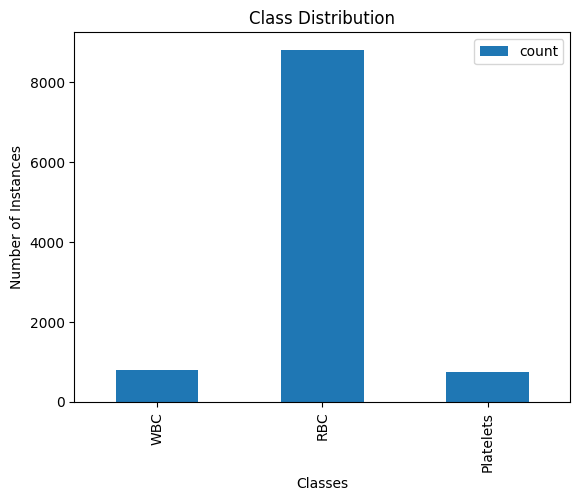

In [ ]:
class_counts = Counter()
for label_file in label_paths:
    with open(label_file, "r") as file:
        lines = file.readlines()
    class_counts.update(Counter([int(line.split()[0]) for line in lines]))

# Replace class IDs with class names
class_counts_names = {class_names[int(class_id)]: count for class_id, count in class_counts.items()}

# Create a pandas DataFrame and plot the bar chart
df = pd.DataFrame.from_dict(class_counts_names, orient="index", columns=["count"])
ax = df.plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.title("Class Distribution")
plt.show()

In [ ]:
data = []

for file in label_paths:
    with open(file) as f:
        lines = f.readlines()
        num_lines = len(lines)
        unique_values = len(set(list(map(lambda x: x.split()[0], lines))))

        data.append([file, num_lines, unique_values])

df = pd.DataFrame(data, columns=['file', 'num_lines', 'unique_values'])

<Axes: >

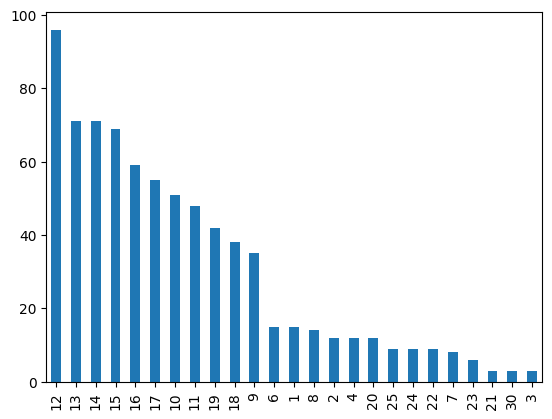

In [ ]:
# distribution of number of detections in an image
df['num_lines'].value_counts().plot(kind='bar')

<Axes: >

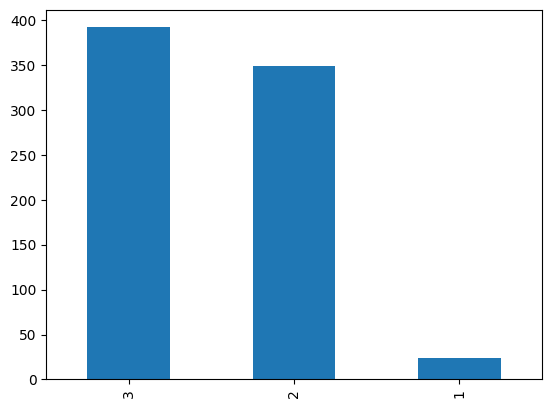

In [ ]:
# distribution of number of unique classes in images
df['unique_values'].value_counts().plot(kind='bar')

In [ ]:
from ultralytics import YOLO

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


In [ ]:
baseline_model = YOLO('yolov8x.pt')

In [ ]:
# !yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=40 imgsz=416 save=true

In [ ]:
params = {
    'data':'data.yaml',
    'imgsz':416,
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True,
    'lr0':0.1,
    'lrf': 0.00001,
    'cos_lr': True
}

In [ ]:
# **params unpacks this dictionary into keyword arguments

results = baseline_model.train(**params)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=1

In [ ]:
pwd

'/content/drive/MyDrive/yolov8'

In [ ]:
import os
os.listdir('runs/detect/train2')

['weights',
 'args.yaml',
 'events.out.tfevents.1692849129.30c6ab21c774.6928.0',
 'results.csv',
 'val_batch0_pred.jpg',
 'val_batch0_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch2_pred.jpg',
 'val_batch2_labels.jpg',
 'PR_curve.png',
 'F1_curve.png',
 'P_curve.png',
 'R_curve.png',
 'confusion_matrix.png']

In [ ]:
model = YOLO('/content/drive/MyDrive/yolov8/runs/detect/train2/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()

Ultralytics YOLOv8.0.161 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/cell-data/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:05<00:00, 13.34it/s]
val: New cache created: /content/drive/MyDrive/yolov8/cell-data/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:02,  1.94it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:03<00:05,  1.69s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]
                   all         73        967      0.721      0.554       0.76      0.415
 

In [ ]:
# Predict with the model
results = model('/content/drive/MyDrive/yolov8/cell-data/test/images')


image 1/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg: 416x416 3 RBCs, 12.6ms
image 2/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00044_jpg.rf.e7760375eba4bc20c5746367e2311e18.jpg: 416x416 4 RBCs, 12.6ms
image 3/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00062_jpg.rf.1be1ca0ecdf783798fc10346baaa203e.jpg: 416x416 9 RBCs, 12.5ms
image 4/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00090_jpg.rf.cdbf8f6ed3b93fa902a0bc991132cb40.jpg: 416x416 2 RBCs, 12.5ms
image 5/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00099_jpg.rf.e3c42cd68359527494a53843479dff5c.jpg: 416x416 9 RBCs, 12.6ms
image 6/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00112_jpg.rf.978cec39235980055c2ad7ff8b6f1912.jpg: 416x416 9 RBCs, 12.6ms
image 7/36 /content/drive/MyDrive/yolov8/cell-data/test/images/BloodImage_00113_jpg.rf.a17463f1ddc2e7729f935f8a

In [ ]:

# !pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.28
    Uninstalling ultralytics-8.0.28:
      Successfully uninstalled ultralytics-8.0.28


In [ ]:
pwd

'/content/drive/MyDrive/yolov8'

In [ ]:
from PIL import Image
import os
# Specify the directory to save the images with annotations
save_directory = '/content/drive/MyDrive/yolov8/Results'
# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Show the results
for idx, r in enumerate(results):
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image

    # Save image with a unique filename in the specified directory
    save_path = os.path.join(save_directory, f'result_{idx}.jpg')
    # Save image with a unique filename
    im.save(save_path)

    print(f"Displayed and saved result_{idx}.jpg")



Displayed and saved result_0.jpg
Displayed and saved result_1.jpg
Displayed and saved result_2.jpg
Displayed and saved result_3.jpg
Displayed and saved result_4.jpg
Displayed and saved result_5.jpg
Displayed and saved result_6.jpg
Displayed and saved result_7.jpg
Displayed and saved result_8.jpg
Displayed and saved result_9.jpg
Displayed and saved result_10.jpg
Displayed and saved result_11.jpg
Displayed and saved result_12.jpg
Displayed and saved result_13.jpg
Displayed and saved result_14.jpg
Displayed and saved result_15.jpg
Displayed and saved result_16.jpg
Displayed and saved result_17.jpg
Displayed and saved result_18.jpg
Displayed and saved result_19.jpg
Displayed and saved result_20.jpg
Displayed and saved result_21.jpg
Displayed and saved result_22.jpg
Displayed and saved result_23.jpg
Displayed and saved result_24.jpg
Displayed and saved result_25.jpg
Displayed and saved result_26.jpg
Displayed and saved result_27.jpg
Displayed and saved result_28.jpg
Displayed and saved resu

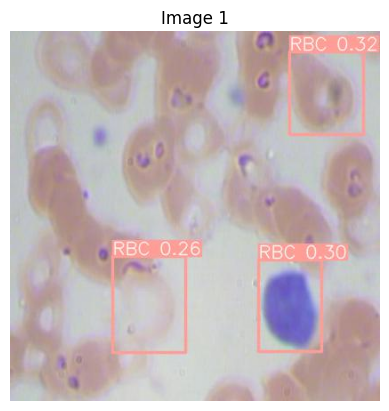

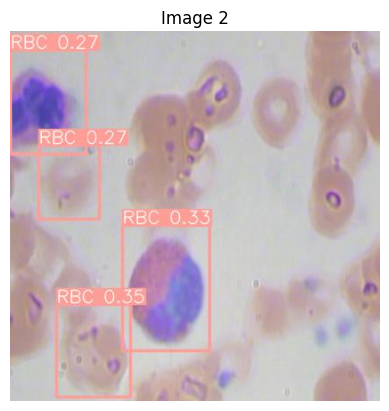

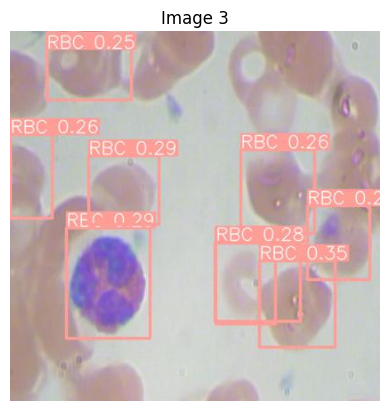

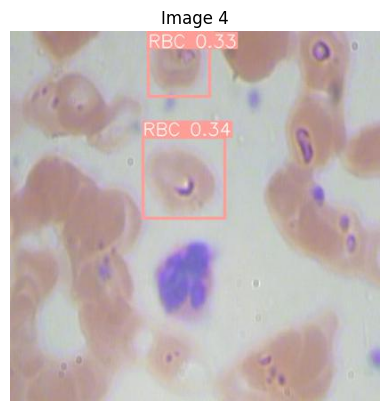

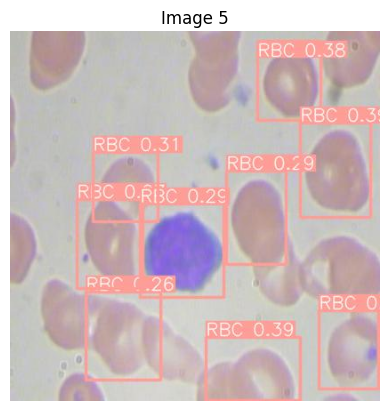

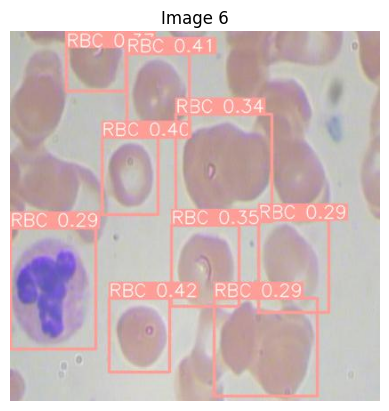

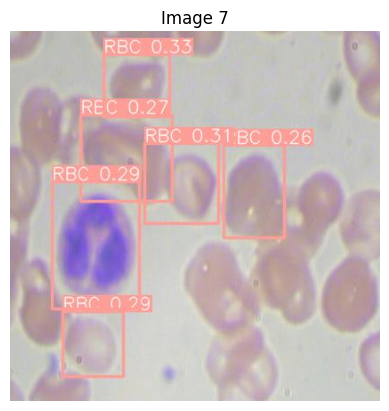

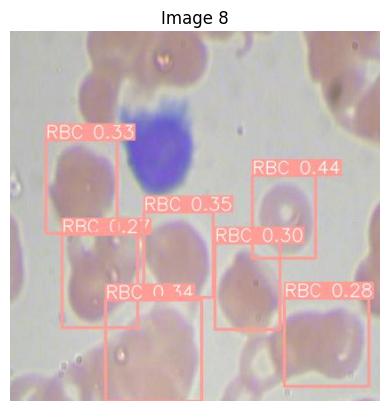

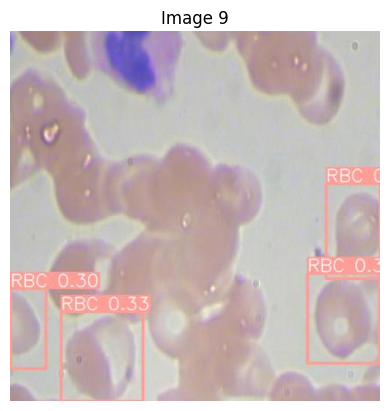

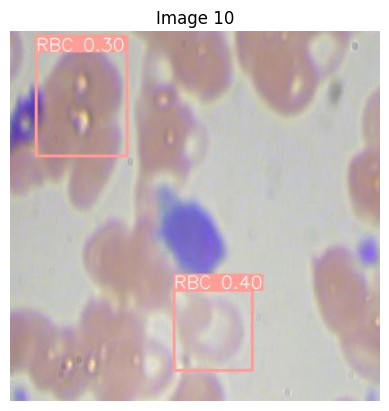

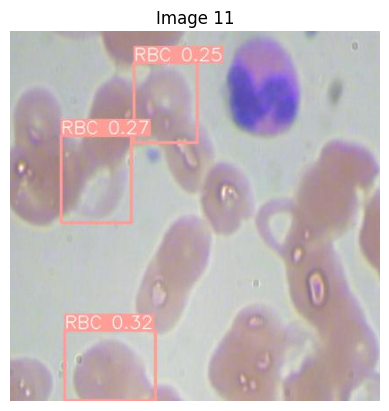

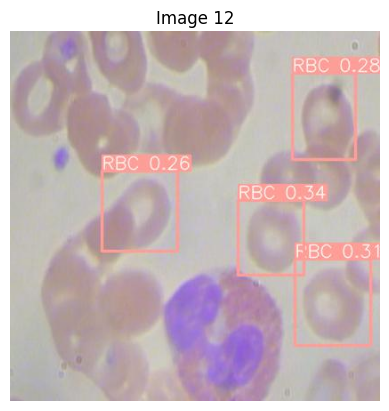

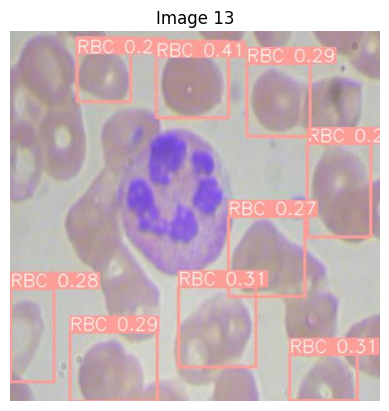

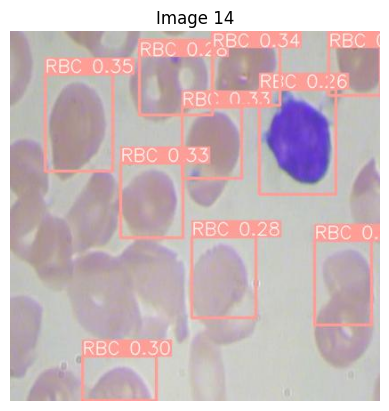

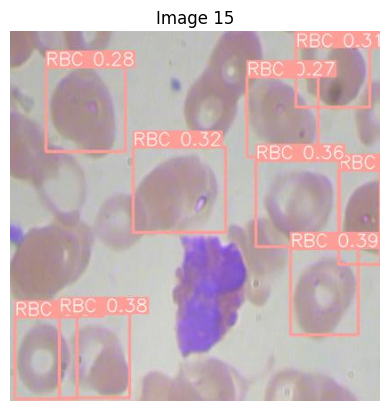

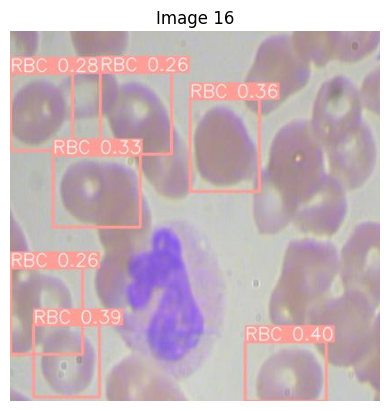

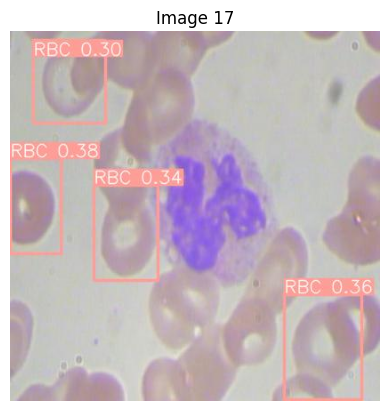

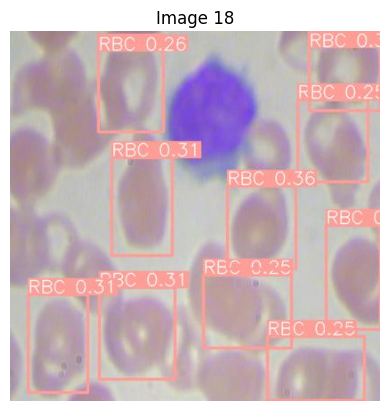

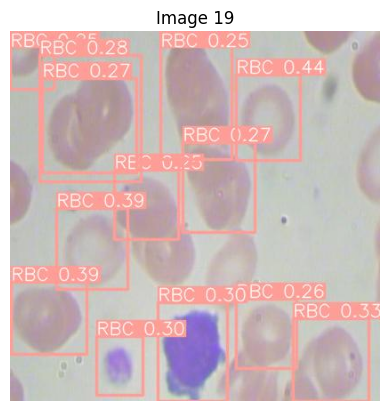

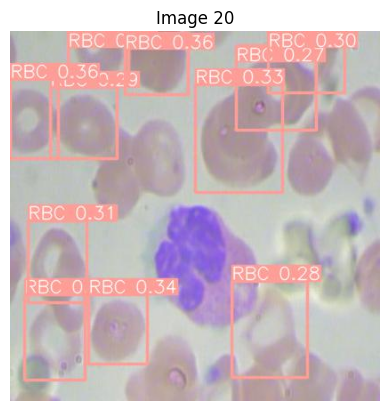

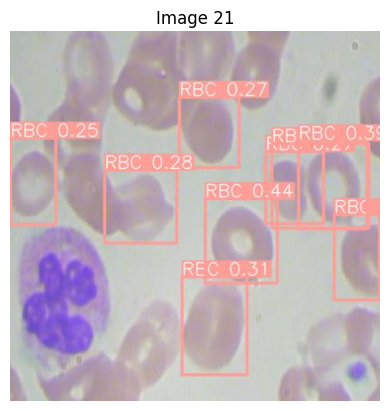

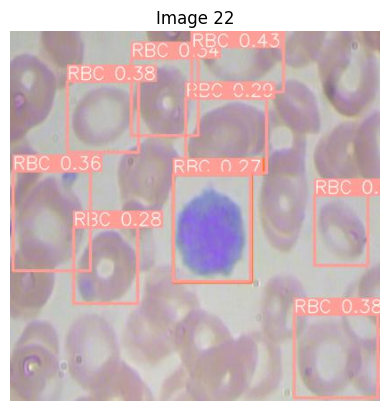

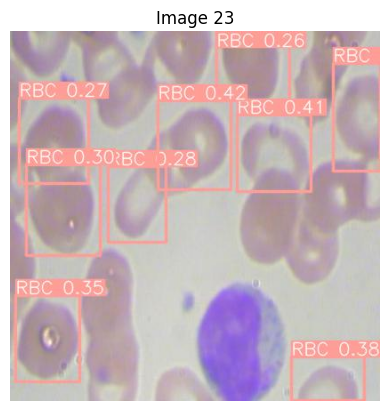

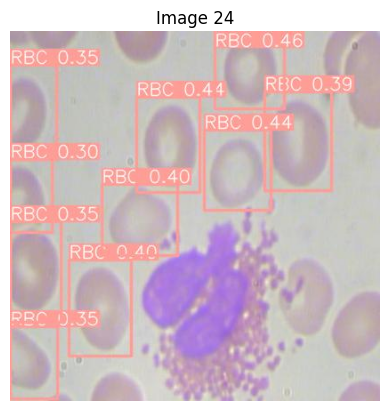

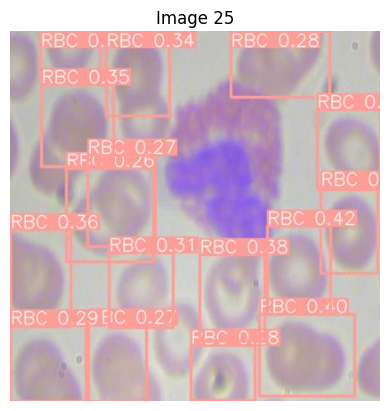

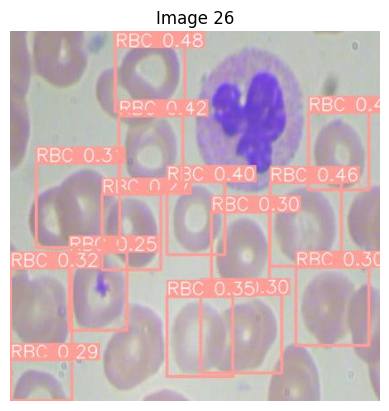

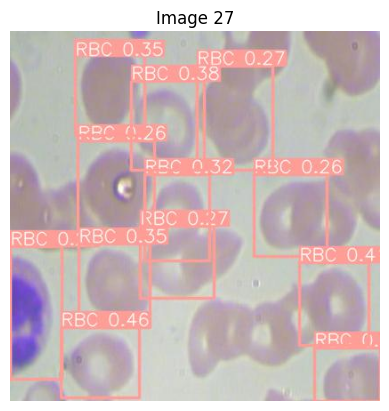

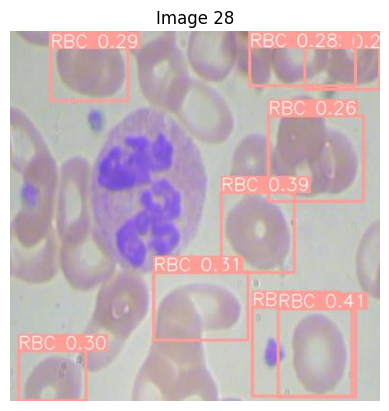

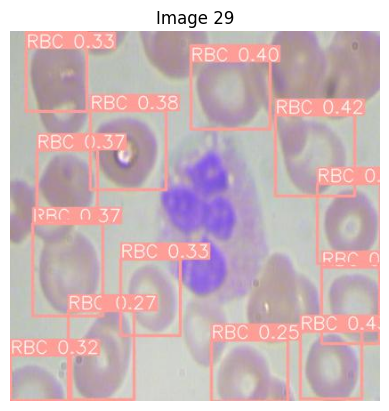

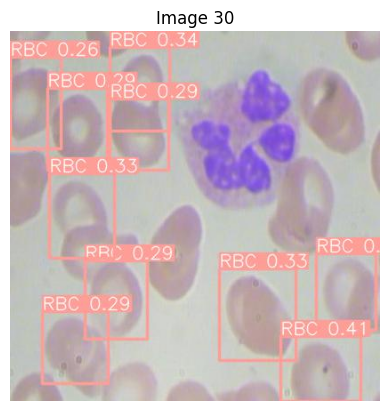

In [ ]:
import glob
import matplotlib.image as mpimg

# Get a list of image filenames in the directory
image_files = glob.glob(os.path.join(save_directory, '*.jpg'))

# Display the first 5 images
for idx in range(min(30, len(image_files))):  # Display up to 5 images or less if available
    image_path = image_files[idx]

    # Load and display the image
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(f"Image {idx + 1}")
    plt.axis('off')  # Turn off axis labels
    plt.show()